# Customer Segmentation Analysis with Starbucks

One size does not fit all.

Qi-Wen Ng | General Assembly Singapore | DSI-14 | June 2020

## Introduction

The ‘average customer’ is a concept of the past. Hitting the average does not mean hitting the majority, and this one-size-fits-all strategy does not work for businesses anymore.  Today, understanding our customers and personalization is key to establish stronger customer relationships and ultimately, sustain a profitable business. Given a diverse set of customer attributes, how can we identify and create experiences for effective acquisition and retention? Enter "customer segmentation", where we break the customer base into groups that share similiarities such as demographics, psychographics, behavioural, geographic, etc.

Businesses need to be able to segment their customers for:
- Marketing: 
    - Create and tailor marketing messages resonating with each segments based on their real or likely behavior, so that businesses can engage with them more effectively. 
    - Better ROI from Marketing

- Sales: 
    - Identify profitable segments to target customers in that segment to boost profits or identify pockets of growth by shifting people into more profitable segments.
    - Retaining existing customers or attracting new customers with the correct profile
    - Identify the most valuable customers and understanding their trends in order to build the relationship further

- Operations:
    - Stock management by understanding the products that are in demand to reduce overstocking / storage costs or improve logistics
    
- Products:
    - Evaluate product offerings or improve specific products. 

## Problem Statement

As one of the most successful loyalty programs, 'Starbucks Rewards' has a staggering 16 million active members and represents a significant portion of the coffee chain’s growth. Starbucks attributes 40% of its total sales to the loyalty program and has seen same store sales rise by 7%. The Rewards Program is available on mobile devices as the 'Starbucks' App, which the company uses to market products, send out offers, collect payments, and give stars (rewards) for freebies. 

While mass marketing tactics are still able to get results, the assumption that simply all the members will be interested in what is being promoted is time-consuming, inefficient and expensive. 

In this context, I will use unsupervised machine learning to address the following:
- Identify and perform customer segmentation based on their commonalities towards offers
- Understanding customer behaviour and providing specific business insights:
    - What offers should be sent to each customer ? 
    - Which customers we should focus for retention / our most profitable customers?
    - Which customers to nurture / focus for potential growth?

## Executive Summary

Our data set contains 17,000 anonymised customer demographics, 306,534 simulated data that mimics customer behavior and customer transactions, and 10 promotional offers or advertisement presented to customers on the Starbucks Rewards mobile app.

Data usually does not usually come in a clean and ready-to-analyze format, and this was the case for my project. The real hard part was to transfer the data in its awkward form to a form I want it to. I had to establish a plan to extract and aggregate the data from the 3 different datasets into a segmentable dataset. I used exploratory analysis to see what type of customers existed, and most importantly, their transaction / promotional engagement habits. Among the feature extraction / cleaning efforts, great challenges resulted from customers having repeat exposures to the same offer, identifying valid offer completions and views (in other words, identifying misattributions), and finally aggregating them into view and conversion rates for each offer type to each customer. I have also calculated recency, frequency and monetary (RFM) scores, which is a common method used for analyzing customer value. Ultimately, I created a customer-centric data, where each row represents a unique customer profile whose demographic attributes and spending behaviours are connected to each other. 

Customers without complete profiles are also a customer. We had 12.8% of total customer profile that had missing demographics. Rather than imputing their data or removing them completely, I decided to separate their profile to evaluate. Then, I used K-Means clustering, an unsupervised machine learning model, to break up the customers into different segments based on how they would respond to promotions. To optimize the model, I used two evaluation metrics to search for the optimal number of clusters:
- Silhouette coefficient (Intercluster distance)
- Inertia Scores / Sum of Squared Errors (Intracluster distance)

After running through many iterations using different sets of features, I decided to select only 11 offer-related / behavioural attributes for segmentation (segmentation attributes), and use the remaining demographic (profiling attributes) only to profile the clusters. 

My results showed that Starbucks customers fell into 9 different clusters, based mostly on their response and conversion to offers, frequency (number of transactions) and monetary (total spent). I presented an overall summary of their behaviours, demographics and profile. 

In addition, I performed an analysis on the offer responsiveness of each cluster. This helps improve marketing focus on what offers to send to customers to ensure effectiveness and optimize our customer acquisition costs. Furthermore, the profitability and life stages of the clusters were also presented. This gives insights into the clusters to focus for retention and clusters to focus on maintaning the relationship / keeping them happy while increasing their purchases. Lastly, I have discovered pockets of potential growth in 4 segments, which Starbucks can focus on to shift these customers into more profitable segments. Two other interesting findings include the misallocation of rewards from non-offer influence and the average revenue generated from offers vs non-offers.

Being aware of these findings and placing priority on important customers will enable Starbucks to optimize their business and drive growth.

### Data Dictionary

There are 3 datasets:

* promotion.json: offer meta data sent to users over 30-day test period

| Features         | Data Type | Remarks                                                           |
| -----------------| ----------|------------------------------------------------------------------ |
| id               | string    | Offer id                                                          |
| offer_type       | string    | Type of offer: BOGO / discount / information                      |
| difficulty       | int       | Minimum required spend to complete an offer                       |
| reward           | int       | Reward given for completing an offer                              |
| duration         | int       | Time for offer to be valid, in days                               |
| channels         | list of strings |  Channels which the offers were sent                        |

* profile.json: customer demographic data 

| Features         | Data Type | Remarks                                                           |
| -----------------| ----------|------------------------------------------------------------------ |
| age              | int       | Age of the customer                                               |
| became_member_on | int       | Date when customer created an account on the rewards app          |
| gender           | str       | Gender of the customer: male(M), female(F), other(O)              |
| id               | str       | Customer id                                                       |
| income           | float     | Customer's income                                                 |


* event-log.json - activity log based on customer

| Features         | Data Type | Remarks                                                           |
| -----------------| ----------|------------------------------------------------------------------ |
| event            | str       | Record description: transaction, offer received, offer viewed, offer completed | 
| person           | str       | Customer id                                                       |
| time             | int       | Time in hours since start of test. The data begins at time t=0    |
| value            | dict of strings     | Either offer id or transaction amount, depending on record description |


Based on the 3 datasets, I created a customer centric dataframe that aggregates all demographic information, behavioural information (receives, views, completion, rewards by offers) and transaction information. This serves as our cleaned and final dataset: 

* customer_df.csv

| Features                  | Data Type | Remarks                                                            |
| --------------------------| ----------| ------------------------------------------------------------------ |
| customer_id               | string    | unique customer identifier                                         |
| gender	                | string    | gender of the customer: male(M), female(F), other(O), none (nan)   |
| age                       | float     | age of the customer                                                |
| income                    | float     | income of the customer
| became_member_on          | datetime  | date the customer became a member                                  |
| days_as_member            | int       | number of days the customer became a member since 31 December 2018 
| bogo_received             | float     | number of bogo offers received
| bogo_viewed               | float     | number of bogo offers viewed
| bogo_completed            | float     | number of bogo offers completed
| bogo_rewarded             | float     | number of bogo offers rewarded
| bogo_viewed_rate          | float     | view rates of bogo offers
| bogo_conversion_rate      | float     | conversion rates of bogo offers
| discount_received         | float     | number of discount offers received
| discount_viewed           | float     | number of discount offers viewed 
| discount_completed        | float     | number of discount offers completed
| discount_rewarded         | float     | number of discount offers rewarded
| discount_viewed_rate      | float     | view rates of discount offers
| discount_conversion_rate  | float     | conversion rates of discount offers
| info_received             | float     | number of informational offers received
| info_viewed               | float     | number of informational offers viewed
| info_viewed_rate          | float     | view rates of informational offers
| total_received            | float     | total number of offers received 
| total_viewed              | float     | total number of offers viewed
| total_completed           | float     | total number of offers completed 
| overall_view_rate         | float     | overall view rates
| overall_conversion_rate   | float     | overall ratio of offers completed compared to how many received |
| total_rewarded            | float     | total rewards given to the customer
| num_transactions          | float     | number of monetary transactions done by the customer
| offer_num_transactions    | float     | number of offer-associated monetary transactions done by the customer
| actual_num_transactions   | float     | number of non-offer monetary transactions done by the customer
| total_spent               | float     | total amount spent by the customer across all transactions
| offer_spent               | float     | total offer-associated amount spent by the customer
| actual_spent              | float     | total non-offer amount spent by the customer
| avg_spent                 | float     | average amount spent by the customer across all transactions
| min_spent                 | float     | lowest amount spent of the customer
| max_spent                 | float     | highest amount spent of the customer
| recency                   | float     | how recent the customer spent 

### Table of Contents

#### Part 1: Data Cleaning, Wrangling & Exploratory Data Analysis
- [1. Data Cleaning & Exploratory Data Analysis](#1.-Preprocessing:-Feature-Selection-&-Scaling)<br>
    - [1.1 Promotion](#2.1-All-Features)<br>
    - [1.2 Profile](#2.1-All-Features)<br>
    - [1.3 Event: Activity Log](#2.1-All-Features)<br>
- [2. Preprocessing: Feature Extraction & Engineering](#2.-Clustering)<br>
    - [2.1 Merge Datasets](#2.1-Merge-Datasets)<br>
    - [2.2 Identifying valid completions and views](#2.2-Identifying-valid-completions-and-views)<br>
    - [2.3 Aggregating features for offers](#2.3-Aggregating-features-for-offers)<br>
    - [2.4 Aggregating features for transactions](#2.4-Aggregating-features-for-transactions)<br>
    - [2.5 Aggregating demographics, offers and transactions at customer level](#2.5-Aggregating-demographics,-offers-and-transactions-at-customer-level)<br>

## Part 1: Data Cleaning, Wrangling & Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)


Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## 1. Data Cleaning & Exploratory Data Analysis

We will first look at the 3 datasets and perform some basic EDA and cleaning to them.

In [4]:
promotion = pd.read_json('./datasets/promotions.json',orient='records', lines=True)
profile = pd.read_json('./datasets/profile.json',orient='records', lines=True)
event = pd.read_json('./datasets/event-log.json',orient='records', lines=True)

### 1.1 Promotion

#### 1.1.1 Preliminary EDA

In [6]:
promotion.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [7]:
promotion.shape

(10, 6)

In [8]:
promotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [9]:
promotion['offer_type'].value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

In [10]:
promotion.sort_values(by= 'offer_type')

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837


**Observations**: 
- 3 types of offers - bogo buy one get one, discount, informational.
- 4 types of medium to send offers - web, email, mobile, social

#### 1.1.2 Cleaning
**Changes to be made**:
- Use a more descriptive name for offers for easier analysis later: Combining type with reward, difficulty and duration.
- Encoding the 'offer_type' column
- Rename 'id' to 'offer_id' ('id' is present in profile dataset representing customer ids instead)

##### 1.1.2.1 Creating more descriptive name for offer

In [11]:
promotion['offer_name'] = promotion['offer_type'] + '-' + promotion['reward'].astype(str) + '-' + promotion['difficulty'].astype(str) + '-' + promotion['duration'].astype(str)
promotion['offer_name']

0           bogo-10-10-7
1           bogo-10-10-5
2    informational-0-0-4
3             bogo-5-5-7
4       discount-5-20-10
5         discount-3-7-7
6       discount-2-10-10
7    informational-0-0-3
8             bogo-5-5-5
9        discount-2-10-7
Name: offer_name, dtype: object

##### 1.1.2.2 Encoding the offer_type column

In [12]:
# encode offer type column
promotion = pd.get_dummies(promotion,columns=['offer_type'])

##### 1.1.2.3 Renaming columns

In [13]:
#rename columns
columns_rename = {'id':'offer_id',
                  'offer_type_bogo':'offer_bogo', 
                  'offer_type_discount':'offer_discount', 
                  'offer_type_informational':'offer_info'}

promotion.rename(columns = columns_rename, inplace=True)

promotion.head()

,reward,channels,difficulty,duration,offer_id,offer_name,offer_bogo,offer_discount,offer_info
0,10,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo-10-10-7,1,0,0
1,10,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo-10-10-5,1,0,0
2,0,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational-0-0-4,0,0,1
3,5,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo-5-5-7,1,0,0
4,5,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount-5-20-10,0,1,0


### 1.2 Profile

#### 1.2.1 Preliminary EDA

In [3]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [4]:
profile.shape

(17000, 5)

In [5]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [6]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


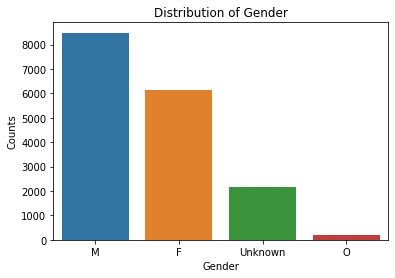

In [104]:
#distribution of gender
sns.barplot(x = profile['gender'].fillna('Unknown').value_counts().index, y = profile['gender'].fillna('Unknown').value_counts())
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Counts');

**Observations**: There are more males than females in our dataset, with a small proportion of gender 'other' and 'unknown' or null.

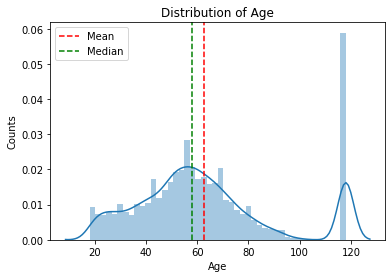

In [8]:
#distribution of age
sns.distplot(profile['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.axvline(profile['age'].mean(),c='r',linestyle = '--',label='Mean')
plt.axvline(profile['age'].median(),c='g',linestyle = '--',label='Median')
plt.legend();

**Observations**: Most customers are around the age of 55-65. Age at maximum of 118 is rather impossible, we will investigate further.

In [9]:
#check if ids are all unique
if len(set(profile['id'])) == len(profile['id']):
    print('All ids are unique')

All ids are unique


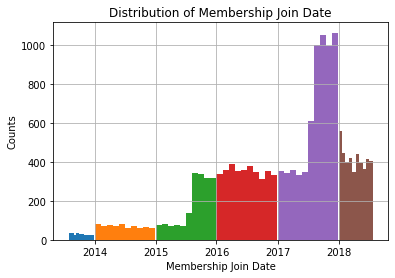

In [10]:
#became_member_on to datetime
profile['became_member_on'] = profile['became_member_on'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

#distribution of years on when members joined
profile['became_member_on'].groupby(profile['became_member_on'].dt.year).hist()
plt.title('Distribution of Membership Join Date')
plt.xlabel('Membership Join Date')
plt.ylabel('Counts');

**Observations**:
Number of customers becoming a member increased every year, except for 2018. However, there could be some sampling bias resulting in more samples for 2017.

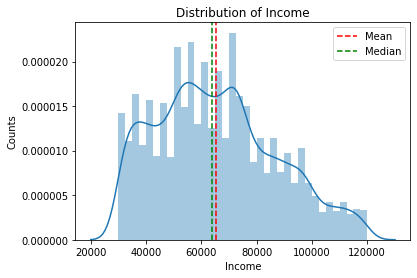

In [18]:
#distribution of income
sns.distplot(profile['income'])
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.axvline(profile['income'].mean(),c='r',linestyle = '--',label='Mean')
plt.axvline(profile['income'].median(),c='g',linestyle = '--',label='Median')
plt.legend();

**Observations**: The distribution is skewed right. Most profiles have income lower than $75000.

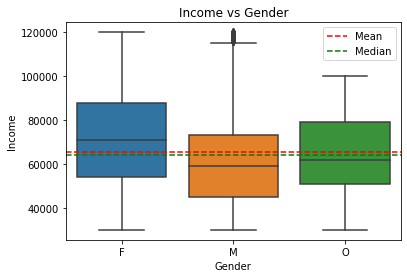

In [19]:
sns.boxplot(x=profile['gender'], y=profile['income'])
plt.title('Income vs Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.axhline(profile['income'].mean(),c='r',linestyle = '--',label='Mean')
plt.axhline(profile['income'].median(),c='g',linestyle = '--',label='Median')
plt.legend();

**Observations**: 
- Average income: females > other gender > males.
- Average income of females is higher than the average income across all customers. 
- There are some outliers for males in the high income range.


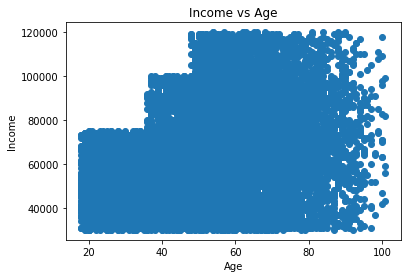

In [11]:
plt.scatter(x=profile['age'], y=profile['income'])
plt.title('Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income');

**Observations**: 
- Age group 20 - 40: Income peaks at below \$80,000
- Age group 40 - 50: Income peaks at \$100,000
- Age group 50 onwards: Income peaks at \$120,000

#### 1.2.2 Null Values

In [21]:
#when gender is null, age is 118, this is perhaps a default value filled in when nothing is given
profile['gender'].isnull().value_counts()

False    14825
True      2175
Name: gender, dtype: int64

In [22]:
profile[profile['gender'].isnull()]['age'].value_counts()

118    2175
Name: age, dtype: int64

In [23]:
profile[profile['gender'].isnull()]['income'].isnull().value_counts()

True    2175
Name: income, dtype: int64

**Observations** : Across every row that has null gender, the age is 118, and the income is also null. Age 118 is likely the default value filled in when users do not input these particulars. To standardise the null values, I will fill those with gender None and age 118 to be NaN. 

#### 1.2.3 Cleaning

- Rename columns: Changing 'id' column to 'customer_id' name
- Converting dtype to datetime object: Changing the 'became_member_on' column to a datetime object
- Filling nulls with np.nan: Fill age = 118 with np.Nan, gender = None with np.Nan

##### 1.2.3.1 Renaming Columns

In [121]:
#profile: change id column to customer_id
profile.rename(columns = {'id': 'customer_id'}, inplace=True)

##### 1.2.3.2 Converting dtype to datetime object

In [122]:
#became_member_on to datetime
#profile['became_member_on'] = profile['became_member_on'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

##### 1.2.3.3 Filling null values with np.nan

In [123]:
#fill gender None with NaN
profile['gender'].fillna(np.nan, inplace = True)

In [124]:
# replace age 118 with NaN
profile['age'].replace(118,np.nan,inplace=True)

### 1.3 Event: Activity Log

#### 1.3.1 Basic EDA

In [26]:
event.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [27]:
event.shape

(306534, 4)

In [28]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [29]:
if list(event['person'].unique()).sort() == list(profile['customer_id'].unique()).sort():
    print("All IDs in event are present in the profile")

All IDs in event are present in the profile


In [30]:
event['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [31]:
#checking out series of events for a random person
event[event['person'] == '78afa995795e4d85b5d9ceeca43f5fef']

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
15561,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},6
47582,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132
47583,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132
49502,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144
53176,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168
85291,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},216
87134,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.67},222
92104,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 29.72},240
141566,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 23.93},378


**Observations**: 

- The records for a person are organized according to time in hours since the start of the test. 

- A typical flow of bogo or discount promotion would involve: 'offer received' -> 'offer viewed' -> 'transaction' -> 'offer completed'. 
    - If the 'transaction' and 'offer completed' event occurs at the same time, it means the completion of the offer is a result of the transaction. 
    - In some cases, an 'offer completed' happens even without the user performing 'offer-viewed' prior to the 'transaction'. 
    - One 'transaction' can also be linked to more than one 'offer-completed'. 
    - Some 'transaction' can also be just a usual purchase that does not involve any offers.

- A typical flow of a information promotion would involve: 'offer received' -> 'offer viewed'


- In the "Value" column, it contains either an offer id, transaction amount, or offer id + reward depending on the record. The "Value" column is a json / dictionary of strings, we will separate these information.

#### 1.3.2 Cleaning
- Extract 'value' column into individual columns and drop
- Encode the 'event' column
- Change 'person' column to 'customer_id'

##### 1.3.2.1 Extract 'value' column into individual columns and drop

In [36]:
#convert the dictionaries in 'value' to a new dataframe
value = event['value'].apply(pd.Series)
value.head()

,offer id,amount,offer_id,reward
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN


**Observations**: There seems to be two inconsistent spellings of 'offer_id' and 'offer id', hence it was splitted into two columns. I will investigate further to see if it is the case.

In [37]:
#check if 'offer_id' not null values has any values in 'offer id'
value[value['offer_id'].notnull()][value['offer id'].notnull()]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,offer id,amount,offer_id,reward


In [38]:
#now we will fill the nulls in column 'offer id' with values from 'offer_id'
value['offer id'].fillna(value['offer_id'],inplace=True)

#drop offer_id
value.drop(columns=['offer_id'],inplace = True)
value.head()

,offer id,amount,reward
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


In [39]:
value.shape, event.shape

((306534, 3), (306534, 4))

In [40]:
#concatenate event and value dataframe on y axis
event = pd.concat([event,value], axis=1)

#drop value column since extracted
event.drop(columns = ['value'],inplace=True)

event.head()

,person,event,time,offer id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


##### 1.3.2.2 Encode the 'event' column

In [41]:
#encode event column
event = pd.get_dummies(event,columns=['event'])

##### 1.3.2.3 Renaming columns

In [42]:
#renaming columns
event.rename(columns = {'person': 'customer_id', 
                        'offer id': 'offer_id',
                        'reward':'reward_given',
                        'event_offer completed':'offer_completed',
                        'event_offer received':'offer_received', 
                        'event_offer viewed':'offer_viewed'}, 
             inplace=True)

In [179]:
summary_offer = pd.merge(event[['offer_id','offer_received','offer_viewed','offer_completed']],
                         promotion[['offer_id','offer_name']],on='offer_id',how='left')

summary_offer = summary_offer.groupby(['offer_name']).sum().reset_index()
summary_offer

,offer_name,offer_received,offer_viewed,offer_completed
0,bogo-10-10-5,7593,7298,3331
1,bogo-10-10-7,7658,6716,3688
2,bogo-5-5-5,7571,7264,4296
3,bogo-5-5-7,7677,4171,4354
4,discount-2-10-10,7597,7327,5317
5,discount-2-10-7,7632,4118,4017
6,discount-3-7-7,7646,7337,5156
7,discount-5-20-10,7668,2663,3420
8,informational-0-0-3,7618,6687,0
9,informational-0-0-4,7617,4144,0


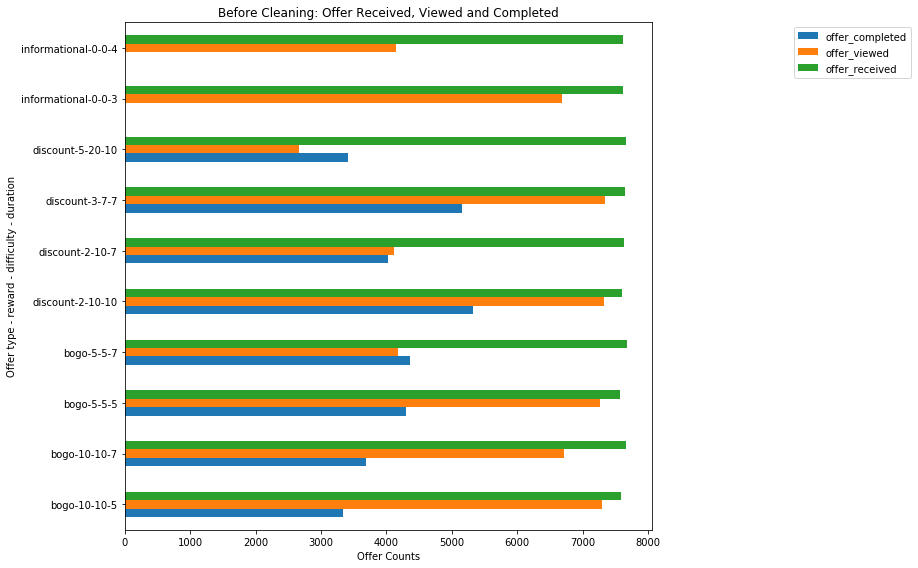

In [180]:
summary_offer.plot(kind='barh', x = 'offer_name', 
                   y = ['offer_completed','offer_viewed', 'offer_received'],
                  figsize = (15,8))
plt.xlabel('Offer Counts')
plt.ylabel('Offer type - reward - difficulty - duration')
plt.title('Before Cleaning: Offer Received, Viewed and Completed')
plt.legend(bbox_to_anchor=(1.5,1))
plt.tight_layout();

**Observations**: 
'discount-5-20-10' and 'bogo-5-5-7' has more completions than view. 

Hence we will need to identify the completions that were influenced by the offer, and not merely because of the customer's normal purchasing behavior. For example, a customer may have received an offer, not view / be aware of the offer, but happens to have spent an amount within the duration of the offer, and have that recorded as an offer completion. In this case, the offer had no influence on the customer's transaction.

This will be done in the preprocessing step later.

#### Wrapping up in function and export to CSV

In [8]:
def clean_promotion(dataframe = promotion):
    '''This function cleans the promotion dataframe by creating a new column for offer name, encoding offer type, and renaming the columns.'''
    
    # More descriptive name for offers
    dataframe['offer_name'] = dataframe['offer_type'] + '-' + dataframe['reward'].astype(str) + '-' + dataframe['difficulty'].astype(str) + '-' + dataframe['duration'].astype(str)
    
    # encode offer type column
    dataframe = pd.get_dummies(dataframe,columns=['offer_type'])
    
    #rename columns
    columns_rename = {'id':'offer_id',
                  'offer_type_bogo':'offer_bogo', 
                  'offer_type_discount':'offer_discount', 
                  'offer_type_informational':'offer_info'}

    dataframe.rename(columns = columns_rename, inplace=True)
    
    return dataframe

In [24]:
def clean_profile(dataframe = profile):
    '''This function cleans the profile dataframe by renaming the column to customer_id, converting datatime columns, and
    filling the missing data with null.'''
    #dataframe: change id column to customer_id
    dataframe.rename(columns = {'id': 'customer_id'}, inplace=True)
    
    #became_member_on to datetime
    #dataframe['became_member_on'] = dataframe['became_member_on'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
    
    #fill gender None with NaN
    dataframe['gender'].fillna(np.nan, inplace = True)
    
    # replace age 118 with NaN
    dataframe['age'].replace(118,np.nan,inplace=True)
    
    return dataframe

In [32]:
def clean_event(dataframe = event):
    '''This function cleans the event dataframe and returns a final dataframe with customer id, offer_id, reward_given,
    and marks the event under each column: offer_completed, offer_received, offer_viewed'''
    #convert the dictionaries in 'value' to a new dataframe
    value = dataframe['value'].apply(pd.Series)
    
    #two inconsistent spellings of offer_id and offer id. Now we will fill the nulls in column 'offer id' with values from 'offer_id'
    value['offer id'].fillna(value['offer_id'],inplace=True)
    
    #drop offer_id
    value.drop(columns=['offer_id'],inplace = True)

    #concatenate dataframe and value dataframe on y axis
    #drop value column since extracted
    dataframe = pd.concat([dataframe,value], axis=1)
    dataframe.drop(columns = ['value'],inplace=True)
    
    #encode event column
    dataframe = pd.get_dummies(dataframe,columns=['event'])
    
    #renaming columns
    dataframe.rename(columns = {'person': 'customer_id', 
                        'offer id': 'offer_id',
                        'reward':'reward_given',
                        'event_offer completed':'offer_completed',
                        'event_offer received':'offer_received', 
                        'event_offer viewed':'offer_viewed'}, 
             inplace=True)
    
    return dataframe

In [9]:
promotion = clean_promotion(promotion)
promotion.head()

,reward,channels,difficulty,duration,offer_id,offer_name,offer_bogo,offer_discount,offer_info
0,10,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo-10-10-7,1,0,0
1,10,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo-10-10-5,1,0,0
2,0,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational-0-0-4,0,0,1
3,5,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo-5-5-7,1,0,0
4,5,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount-5-20-10,0,1,0


In [25]:
profile = clean_profile(profile)
profile.head()

,gender,age,customer_id,became_member_on,income
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [35]:
event = clean_event(event)
event.head()

,customer_id,time,offer_id,amount,reward_given,offer_completed,offer_received,offer_viewed,event_transaction
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,0,1,0,0


In [14]:
#checkpoint 1
#export all to csv
#promotion.to_csv('./datasets/promotion.csv', index=False)
#profile.to_csv('./datasets/profile.csv', index=False)
#event.to_csv('./datasets/event.csv', index=False)

## 2. Preprocessing: Feature Extraction & Engineering

1) Merge all 3 datasets.

2) Identify valid completed offers (viewed before completion) and valid viewed offers (viewed before offer ends).

3) Create an `offer_df` dataframe to aggregate all offer details by customer_id and unique_offer_id (as some offers were received more than once).
- Receives, views, completion, rewards by offer type and their respective timings

4) Create a `transaction_df` dataframe to aggregate all transaction information by customer_id.
- Total, offer-related and actual (non-offer-related) transaction numbers and amount. Min spent, Max spent, average spent.

5) Using `offer_df` and `transaction_df`, create a customer-centric `customer_df` dataframe that aggregates all demographic information, behavioural information (receives, views, completion, rewards by offers) and transaction information. 

- Engineer these features: days_as_member, view rates, conversion rates, recency (how recent has the customer spent). 

### 2.1 Merge Datasets

In [168]:
#import csv
promotion = pd.read_csv('./datasets/promotion.csv')
profile = pd.read_csv('./datasets/profile.csv')
event = pd.read_csv('./datasets/event.csv')

In [169]:
#check shape before merge
promotion.shape, profile.shape,event.shape

((10, 9), (17000, 5), (306534, 9))

In [170]:
#merge profile with event
profile_event = pd.merge(profile, event, on='customer_id', how='right')

In [171]:
#merge profile_event with promotions
df = pd.merge(profile_event, promotion, on='offer_id', how='left')

In [172]:
#checking the shape after merge
df.shape

(306534, 21)

In [173]:
#rearranging columns
columns_arrange = ['customer_id','gender','age','became_member_on','income','offer_id', 'offer_name','offer_bogo', 'offer_discount', 'offer_info','reward','channels','difficulty','duration','offer_completed','offer_received', 'offer_viewed', 'event_transaction','amount','reward_given','time']
df = df[columns_arrange]

In [174]:
df.head()

,customer_id,gender,age,became_member_on,income,offer_id,offer_name,offer_bogo,offer_discount,offer_info,reward,channels,difficulty,duration,offer_completed,offer_received,offer_viewed,event_transaction,amount,reward_given,time
0,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,2017-02-12,NaN,2906b810c7d4411798c6938adc9daaa5,discount-2-10-7,0.0,1.0,0.0,2.0,"['web', 'email', 'mobile']",10.0,7.0,0,1,0,0,NaN,NaN,168
1,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,2017-02-12,NaN,2906b810c7d4411798c6938adc9daaa5,discount-2-10-7,0.0,1.0,0.0,2.0,"['web', 'email', 'mobile']",10.0,7.0,0,0,1,0,NaN,NaN,216
2,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,2017-02-12,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount-5-20-10,0.0,1.0,0.0,5.0,"['web', 'email']",20.0,10.0,0,1,0,0,NaN,NaN,336
3,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,2017-02-12,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount-5-20-10,0.0,1.0,0.0,5.0,"['web', 'email']",20.0,10.0,0,0,1,0,NaN,NaN,348
4,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,2017-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0.35,NaN,360


#### Wrapping it up in a function and export to csv

In [175]:
def merge_dataset(profile = profile, event = event, promotion = promotion):
    '''This function merges the 3 datasets profile, event, and promotion on their customer_id or offer_id'''
    #merge profile with event
    profile_event = pd.merge(profile, event, on='customer_id', how='right')
    
    #merge profile_event with promotions
    dataframe = pd.merge(profile_event, promotion, on='offer_id', how='left')
    
    #rearranging columns
    columns_arrange = ['customer_id','gender','age','became_member_on','income','offer_id', 'offer_name','offer_bogo', 'offer_discount', 'offer_info','reward','channels','difficulty','duration','offer_completed','offer_received', 'offer_viewed', 'event_transaction','amount','reward_given','time']
    dataframe = dataframe[columns_arrange]

    return dataframe

In [176]:
df = merge_dataset(profile,event,promotion)
df.head()

,customer_id,gender,age,became_member_on,income,offer_id,offer_name,offer_bogo,offer_discount,offer_info,reward,channels,difficulty,duration,offer_completed,offer_received,offer_viewed,event_transaction,amount,reward_given,time
0,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,2017-02-12,NaN,2906b810c7d4411798c6938adc9daaa5,discount-2-10-7,0.0,1.0,0.0,2.0,"['web', 'email', 'mobile']",10.0,7.0,0,1,0,0,NaN,NaN,168
1,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,2017-02-12,NaN,2906b810c7d4411798c6938adc9daaa5,discount-2-10-7,0.0,1.0,0.0,2.0,"['web', 'email', 'mobile']",10.0,7.0,0,0,1,0,NaN,NaN,216
2,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,2017-02-12,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount-5-20-10,0.0,1.0,0.0,5.0,"['web', 'email']",20.0,10.0,0,1,0,0,NaN,NaN,336
3,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,2017-02-12,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount-5-20-10,0.0,1.0,0.0,5.0,"['web', 'email']",20.0,10.0,0,0,1,0,NaN,NaN,348
4,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,2017-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0.35,NaN,360


In [177]:
#checkpoint 2
#export to csv
#df.to_csv('./datasets/df_merge.csv', index=False)

### 2.2 Identifying valid completions and views
We will need to identify the completions that were influenced by the offer, and not merely because of the customer's normal purchasing behavior. For example, a customer may have received an offer, not view / be aware of the offer, but happens to have spent an amount within the duration of the offer, and have that recorded as an offer completion. In this case, the offer had no influence on the customer's transaction.

Here I will create and run two functions which determines whether an offer_complete / offer_viewed is valid. I will then add two new columns `valid_complete` and `valid_view` to the dataframe, with 1 indicating True and 0 indicating False.
- A offer_complete is valid when it has been viewed before completion - `valid_complete`
- An offer_viewed is valid when it has been viewed before the offer_received ends - `valid_view`

In [13]:
#read csv
df = pd.read_csv('./datasets/df_merge.csv')

In [53]:
def find_completed_valid_index(dataframe):
    '''
    This function takes in a dataframe of customer ids, offer ids, offer duration, activity time, 
    offer completion, offer view and determines if the completion is valid by the criteria that 
    it has been viewed before completion. It then returns the index of the row of the valid completion. 
    '''
    # list of valid index of offer completed
    completed_valid_index = []

    #iterate over each unique customer_id
    for customer_id in dataframe['customer_id'].unique():
        
        # get all activity for the customer_id
        all_activity = dataframe[dataframe['customer_id'] == customer_id]
        
        # get all completed activities for that customer_id
        completed_activity = all_activity[all_activity['offer_completed'] == 1]

        # iterate over each completed activity's offer_id
        for offer_id in completed_activity['offer_id'].unique():
            
            # get the completed offer's row
            completed_offer = completed_activity[completed_activity['offer_id'] == offer_id]
            
            # get offer_received time = completed_offer time - offer duration
            start_time = completed_offer['time'].values - (completed_offer['duration'].values * 24)
            
            # the offer completed time
            completed_time = completed_offer['time'].values
            
            # take the activities within valid time within start_time and comp_time
            for i,time in enumerate(completed_time):
                current_completed_offer = completed_offer[completed_offer['time'] == time]
                
                activity_valid = all_activity[(all_activity['time'] >= start_time[i]) 
                                              & (all_activity['time'] <= completed_offer['time'].values[i])]
            
                # take only event of offer viewed for the given offer_id
                activity_valid_viewed = activity_valid[(activity_valid['offer_viewed'] == 1) 
                                                       & (activity_valid['offer_id'] == offer_id)]

                # if activity_valid_viewed is not empty, then the offer_completed is valid since it was viewed
                # extend the completed valid index
                if activity_valid_viewed.shape[0] > 0:
                    completed_valid_index.extend(current_completed_offer.index)

    return completed_valid_index

In [54]:
def find_viewed_valid_index(dataframe):
    '''
    This function takes in a dataframe of customer ids, offer ids, offer duration, activity time, 
    offer receival, offer view and determines if the view is valid by the criteria that it has been
    viewed within the offer duration after receival. 
    It then returns the index of the row of the valid view. 
    '''
    # list of valid index of offer view
    viewed_valid_index = []

    #iterate over each unique customer_id
    for customer_id in dataframe['customer_id'].unique():
        
        # get all activity for the customer_id
        all_activity = dataframe[dataframe['customer_id'] == customer_id]
        
        # get all received activities for that customer_id
        received_activity = all_activity[all_activity['offer_received'] == 1]

        # iterate over each received activity's offer_id
        for offer_id in received_activity['offer_id'].unique():
            
            # get the received offer's row
            received_offer = received_activity[received_activity['offer_id'] == offer_id]
            
            # get offer_received time 
            start_time = received_offer['time'].values
            
            # the offer end time
            end_time = received_offer['time'].values + (received_offer['duration'].values * 24)
            
            # iterate over the offer received start time
            for i,time in enumerate(start_time):
            
                # take the activities within valid time (within start_time and end_time)
                activity_valid = all_activity[(all_activity['time'] >= start_time[i]) 
                                              & (all_activity['time'] <= end_time[i])] 
            
                # take only event of offer viewed for the given offer_id
                activity_valid_viewed = activity_valid[(activity_valid['offer_viewed'] == 1) 
                                                       & (activity_valid['offer_id'] == offer_id)]

                # if activity_valid_viewed is not empty, then the viewed offer is valid 
                # since it lies within the offer valid duration
                if activity_valid_viewed.shape[0] > 0 :
                    # extend the list of index
                    viewed_valid_index.extend(activity_valid_viewed.index)

    return viewed_valid_index

In [55]:
#run functions on dataframe
#note: this will take a long time to run
valid_index_complete = find_completed_valid_index(df)
valid_index_view = find_viewed_valid_index(df)

In [250]:
#marking valid_complete in df
df.loc[df.index.isin(valid_index_complete),'valid_complete'] = 1
df.loc[~df.index.isin(valid_index_complete),'valid_complete'] = 0

#marking valid_view in df
df.loc[df.index.isin(valid_index_view),'valid_view'] = 1
df.loc[~df.index.isin(valid_index_view),'valid_view'] = 0

#### Wrapping it up in a function

In [11]:
#note: this will take a long time to run.
def generate_valid_complete_view_columns(dataframe):
    '''This function returns the dataframe with a new column valid_complete to mark valid completions 
    and valid_view to mark valid views'''
    
    #find valid indexes of complete and view
    valid_index_complete = find_completed_valid_index(dataframe)
    valid_index_view = find_viewed_valid_index(dataframe)
    
    #marking valid_complete in df
    dataframe.loc[dataframe.index.isin(valid_index_complete),'valid_complete'] = 1
    dataframe.loc[~dataframe.index.isin(valid_index_complete),'valid_complete'] = 0

    #marking valid_view in df
    dataframe.loc[dataframe.index.isin(valid_index_view),'valid_view'] = 1
    dataframe.loc[~dataframe.index.isin(valid_index_view),'valid_view'] = 0
    
    return dataframe

In [ ]:
df = generate_valid_complete_view_columns(df)
df.head()

In [251]:
#checkpoint 3
#export to csv
#df.to_csv('./datasets/df_valid.csv')

### 2.3 Aggregating features for offers

We will now create a temporary dataframe to do a cumcount() of duplicates with the data organized by time, so that we can create `unique_offer_id`. At this point, `valid_view` will replace `offer_viewed`, and `valid_complete` will replace `offer_completed`. 

Once `unique_offer_id` is created, we will add in the times for offer_receive, offer_view, and offer_complete.

We will then groupby `customer_id` and `unique_offer_id` to aggregate all the offers.

For offers that were sent more than once, some customers have already viewed the offer that was sent earlier. Hence they are actually aware of the offer. Subsequently as they received the same offer again, they completed it without viewing, hence we will classify these as a valid view as well.

In [98]:
#read csv
df = pd.read_csv('./datasets/df_valid.csv', index_col=0)

In [ ]:
#remove transaction data
temp_df = df[df['offer_id'].notnull()]

#drop rows which are irrelevant in our cumcount()
temp_df = temp_df.drop(columns=['time','channels','offer_completed','offer_viewed'])

#fill up gender, age, income with NA so that we can perform cumcount() correctly
temp_df.fillna('NA',inplace=True)

In [92]:
# appearance of duplicates using cumcount to see if an offer has been received / viewed more than once based on order of occurence
temp_df['appeared'] = temp_df.groupby([*temp_df]).cumcount().add(1)

In [93]:
#get unique_offer_ids
df['unique_offer_id'] = temp_df['offer_id'] + '-' + temp_df['appeared'].astype(str)

In [94]:
#adding 0.1 to time so that when calculating receive, view, completion time, so no confusion later if it occurs at time 0
df['time'] = df['time'] + 0.1

#adding receive, view, completion time column
df['offer_received_time'] = temp_df['offer_received'] * df['time']
df['offer_viewed_time'] = temp_df['valid_view'] * df['time']
df['offer_completed_time'] = temp_df['valid_complete'] * df['time']
#df['offer_end_time'] = df['offer_received_time'] + df['duration'] * 24}

In [95]:
#aggregating offers: groupby customer id and the unique offer id
offer_df = df.groupby(['customer_id','unique_offer_id']).max().reset_index()

In [ ]:
# some viewed the earlier offers sent, or view them after the earlier offer ended are still aware of the offer
# but subsequently as they received the same offer again, but didnt view it before (possibly notifications)
# we will classify this as a valid view
cond1 = (offer_df['offer_completed'] == 1) & (offer_df['offer_received'] == 1) & (offer_df['offer_viewed'] == 0) & (offer_df['valid_complete'] == 1)
cond2 = (offer_df['offer_completed'] == 1) & (offer_df['offer_received'] == 1) & (offer_df['offer_viewed'] == 1) & (offer_df['valid_complete'] == 1) & (offer_df['valid_view'] == 0)
offer_df.loc[cond1,'valid_view'] = 1
offer_df.loc[cond2,'valid_view'] = 1

#### Wrapping it up in a function and export to csv

In [253]:
def generate_offer_dataframe(dataframe):
    '''This function takes in a dataframe of customer's activity that has been sorted sequentially.
    It returns a dataframe grouped by customer_id and unique_offer_id with the time of customer offer activity 
    according to received, viewed, completion '''
    
    #remove transaction data
    temp_df = dataframe[dataframe['offer_id'].notnull()]

    #drop rows which are irrelevant in our cumcount()
    temp_df = temp_df.drop(columns=['time','channels','offer_completed','offer_viewed'])

    #fill up gender, age, income with NA so that we can perform cumcount() correctly
    temp_df.fillna('NA',inplace=True)
    
    # appearance of duplicates using cumcount to see if an offer has been received / viewed more than once based on order of occurence
    temp_df['appeared'] = temp_df.groupby([*temp_df]).cumcount().add(1)
    
    #get unique_offer_ids
    dataframe['unique_offer_id'] = temp_df['offer_id'] + '-' + temp_df['appeared'].astype(str)
    
    #adding 0.1 to time so that when calculating receive, view, completion time, so no confusion later if it occurs at time 0
    dataframe['time'] = dataframe['time'] + 0.1

    #adding receive, view, completion time column
    dataframe['offer_received_time'] = temp_df['offer_received'] * dataframe['time']
    dataframe['offer_viewed_time'] = temp_df['valid_view'] * dataframe['time']
    dataframe['offer_completed_time'] = temp_df['valid_complete'] * dataframe['time']
    #df['offer_end_time'] = df['offer_received_time'] + df['duration'] * 24
    
    # aggregating offers: groupby customer id and the unique offer id
    offer_dataframe = dataframe.groupby(['customer_id','unique_offer_id']).max().reset_index()
    
    # some viewed the earlier offers sent, or view them after the earlier offer ended are still aware of the offer
    # but subsequently as they received the same offer again, but didnt view it before (possibly notifications)
    # we will classify this as a valid view
    cond1 = (offer_dataframe['offer_completed'] == 1) & (offer_dataframe['offer_received'] == 1) & (offer_dataframe['offer_viewed'] == 0) & (offer_dataframe['valid_complete'] == 1)
    cond2 = (offer_dataframe['offer_completed'] == 1) & (offer_dataframe['offer_received'] == 1) & (offer_dataframe['offer_viewed'] == 1) & (offer_dataframe['valid_complete'] == 1) & (offer_dataframe['valid_view'] == 0)
    offer_dataframe.loc[cond1,'valid_view'] = 1
    offer_dataframe.loc[cond2,'valid_view'] = 1
    
    return offer_dataframe

In [254]:
offer_df = generate_offer_dataframe(df)
offer_df.head()

,customer_id,unique_offer_id,gender,age,became_member_on,income,offer_id,offer_name,offer_bogo,offer_discount,offer_info,reward,channels,difficulty,duration,offer_completed,offer_received,offer_viewed,event_transaction,amount,reward_given,time,valid_complete,valid_view,offer_received_time,offer_viewed_time,offer_completed_time
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5-1,M,33.0,2017-04-21,72000.0,2906b810c7d4411798c6938adc9daaa5,discount-2-10-7,0.0,1.0,0.0,2.0,"['web', 'email', 'mobile']",10.0,7.0,1,1,0,0,NaN,2.0,576.1,0.0,0.0,576.1,0.0,0.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed-1,M,33.0,2017-04-21,72000.0,3f207df678b143eea3cee63160fa8bed,informational-0-0-4,0.0,0.0,1.0,0.0,"['web', 'email', 'mobile']",0.0,4.0,0,1,1,0,NaN,NaN,372.1,0.0,1.0,336.1,372.1,0.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837-1,M,33.0,2017-04-21,72000.0,5a8bc65990b245e5a138643cd4eb9837,informational-0-0-3,0.0,0.0,1.0,0.0,"['email', 'mobile', 'social']",0.0,3.0,0,1,1,0,NaN,NaN,192.1,0.0,1.0,168.1,192.1,0.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d-1,M,33.0,2017-04-21,72000.0,f19421c1d4aa40978ebb69ca19b0e20d,bogo-5-5-5,1.0,0.0,0.0,5.0,"['web', 'email', 'mobile', 'social']",5.0,5.0,1,1,1,0,NaN,5.0,456.1,0.0,1.0,408.1,456.1,0.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4-1,M,33.0,2017-04-21,72000.0,fafdcd668e3743c1bb461111dcafc2a4,discount-2-10-10,0.0,1.0,0.0,2.0,"['web', 'email', 'mobile', 'social']",10.0,10.0,1,1,1,0,NaN,2.0,540.1,0.0,1.0,504.1,540.1,0.0


In [257]:
#checkpoint 4
#export to csv
#offer_df.to_csv('./datasets/offer_df.csv')

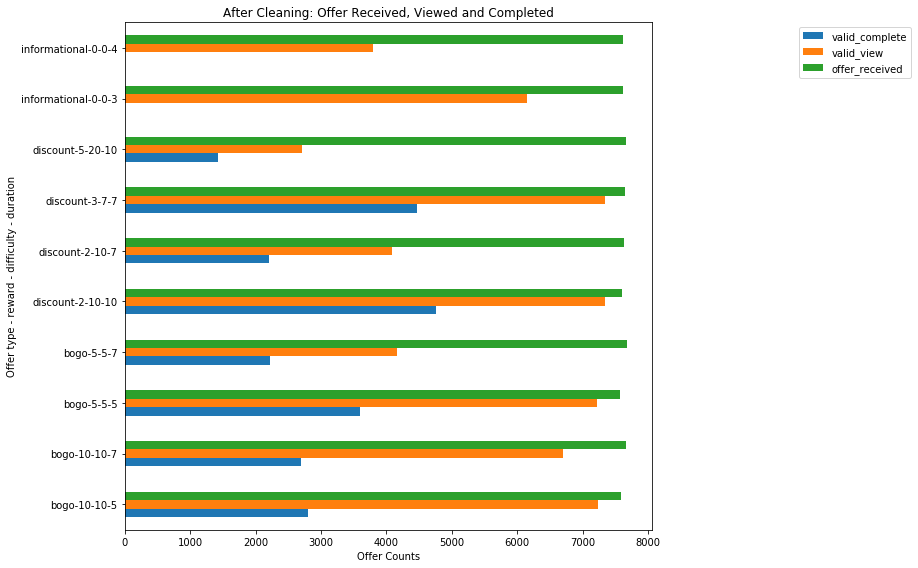

In [256]:
summary_offer_clean = offer_df[['offer_name','offer_received','valid_view','valid_complete']].groupby(['offer_name']).sum().reset_index()

summary_offer_clean.plot(kind='barh', x = 'offer_name', 
                         y = ['valid_complete','valid_view', 'offer_received'],
                         figsize = (15,8)
                        )
plt.xlabel('Offer Counts')
plt.ylabel('Offer type - reward - difficulty - duration')
plt.title('After Cleaning: Offer Received, Viewed and Completed')
plt.legend(bbox_to_anchor=(1.5,1))
plt.tight_layout();

**Observations**: Now completions are less than views, looks ready.

In [102]:
bogo_rewards = offer_df[(offer_df['offer_bogo'] == 1)]['reward_given'].sum()
bogo_valid_completion = offer_df[(offer_df['offer_bogo'] == 1) & (offer_df['offer_completed'] == 1) & (offer_df['valid_complete'] == 1)]['reward_given'].sum()
bogo_invalid_completion = offer_df[(offer_df['offer_bogo'] == 1) & (offer_df['offer_completed'] == 1) & (offer_df['valid_complete'] == 0)]['reward_given'].sum()

disc_rewards = offer_df[(offer_df['offer_discount'] == 1)]['reward_given'].sum()
disc_valid_completion = offer_df[(offer_df['offer_discount'] == 1) & (offer_df['offer_completed'] == 1) & (offer_df['valid_complete'] == 1)]['reward_given'].sum()
disc_invalid_completion = offer_df[(offer_df['offer_discount'] == 1) & (offer_df['offer_completed'] == 1) & (offer_df['valid_complete'] == 0)]['reward_given'].sum()

total_rewards = offer_df['reward_given'].sum()
reward_valid_completion = offer_df[(offer_df['offer_completed'] == 1) & (offer_df['valid_complete'] == 1)]['reward_given'].sum()
reward_invalid_completion = offer_df[(offer_df['offer_completed'] == 1) & (offer_df['valid_complete'] == 0)]['reward_given'].sum()

print(f'Total BOGO rewards given: {bogo_rewards}')
print(f'Total BOGO rewards correctly given (completed after viewing): {bogo_valid_completion}')
print(f'Total BOGO rewards incorrectly given: {bogo_invalid_completion}')
print('-------------')
print(f'Total DISCOUNT rewards given: {disc_rewards}')      
print(f'Total DISCOUNT rewards correctly given (completed after viewing): {disc_valid_completion}')
print(f'Total DISCOUNT rewards incorrectly given: {disc_invalid_completion}')
print('-------------')
print(f'Total rewards given: {total_rewards}')
print(f'Total rewards correctly given (completed after viewing): {reward_valid_completion}')
print(f'Total rewards incorrectly given: {reward_invalid_completion}')
print('-------------')
print(f'Percentage of incorrectly given rewards: {round(reward_invalid_completion / total_rewards * 100, 2)} %')

Total BOGO rewards given: 109565.0
Total BOGO rewards correctly given (completed after viewing): 83990.0
Total BOGO rewards incorrectly given: 25575.0
-------------
Total DISCOUNT rewards given: 49731.0
Total DISCOUNT rewards correctly given (completed after viewing): 34422.0
Total DISCOUNT rewards incorrectly given: 15309.0
-------------
Total rewards given: 159296.0
Total rewards correctly given (completed after viewing): 118412.0
Total rewards incorrectly given: 40884.0
-------------
Percentage of incorrectly given rewards: 25.67 %


**Observations**: After identifying the valid completed offers, we realized that 25.67% of the rewards given were not actually completed due to offer influence, but completed as a result of the customer's normal behavior. Essentially, there would have been more revenue should these incorrectly given rewards were avoided.

### 2.4 Aggregating features for transactions

Here we create a dataframe consisting of all the transaction details.

In [5]:
#read csv
df = pd.read_csv('./datasets/df_valid.csv', index_col=0)

In [ ]:
#number of transactions and total spent
transaction_df = df[df['event_transaction']==1].groupby('customer_id')['event_transaction','amount'].sum().reset_index()

#renaming columns
transaction_df.rename(columns={'event_transaction':'num_transactions',
                      'amount':'total_spent'}, inplace=True)

In [ ]:
#get transactions resulted from offers
#valid_completion (offer) always comes after the transaction 
#so valid_completion (offer) index minus 1 will be a transaction resulted by the valid_completion
#get common elements between the two list and mark transaction resulted by offers
#then groupby and sum the amount of those rows 
valid_complete_i = df[(df['valid_complete'] == 1)].index
event_transaction_i = df[(df['event_transaction'] == 1)].index        
offer_transaction_i = sorted(list(set(valid_complete_i - 1).intersection(event_transaction_i)))
df.loc[df.index.isin(offer_transaction_i),'offer_spent'] = 1
offer_spent = df[df['offer_spent'] == 1].groupby('customer_id')['amount'].sum()
transaction_df = transaction_df.merge(offer_spent, on = 'customer_id', how = 'left')
transaction_df.rename(columns={'amount':'offer_spent'},inplace = True)
transaction_df['offer_spent'].fillna(0, inplace=True)

#get number of offer transactions
offer_num_transactions = df[df['event_transaction'] == 1].groupby('customer_id')['offer_spent'].sum()
transaction_df = transaction_df.merge(offer_num_transactions, on='customer_id',how='left')
transaction_df.rename(columns={'offer_spent_x': 'offer_spent',
                               'offer_spent_y':'offer_num_transactions'}, inplace=True)

#get number of non offer transactions
transaction_df['actual_num_transactions'] = transaction_df['num_transactions'] - transaction_df['offer_num_transactions']

#get non offer_spent
transaction_df['actual_spent'] = transaction_df['total_spent'] - transaction_df['offer_spent']

In [ ]:
#average spent
transaction_df['avg_spent'] = round((transaction_df['total_spent'] / transaction_df['num_transactions']),2)

#round total spent
transaction_df['total_spent'] = round(transaction_df['total_spent'],2)

#get min spent
min_spent = df[df['event_transaction'] == 1].groupby('customer_id')['amount'].min()
transaction_df = transaction_df.merge(min_spent, on='customer_id',how='left')
transaction_df.rename(columns={'amount':'min_spent'}, inplace=True)

#get max spent
max_spent = df[df['event_transaction'] == 1].groupby('customer_id')['amount'].max()
transaction_df = transaction_df.merge(max_spent, on='customer_id',how='left')
transaction_df.rename(columns={'amount':'max_spent'}, inplace=True)

In [7]:
offer_transactions = transaction_df['offer_num_transactions'].sum()
average_offer_spent = round(transaction_df['offer_spent'].sum()/transaction_df['offer_num_transactions'].sum(), 2)

actual_transactions = transaction_df['actual_num_transactions'].sum()
average_actual_spent = round(transaction_df['actual_spent'].sum()/transaction_df['actual_num_transactions'].sum(),2 )
print(f'Number of offer transactions: {offer_transactions}')
print(f'Average offer spent per transaction: {average_offer_spent}')
print('------')
print(f'Number of non-offer transactions: {actual_transactions}')
print(f'Average non-offer spent per transaction: {average_actual_spent}')

Number of offer transactions: 22201.0
Average offer spent per transaction: 19.73
------
Number of non-offer transactions: 116752.0
Average non-offer spent per transaction: 11.46


#### Wrapping it up in a function and export to csv

In [105]:
def extract_transactions(dataframe):
    '''This function takes in a dataframe of individual transactions and 
    returns the total number of transactions, offer-related transaction number, 
    non-offer transaction number, total spent, offer-related spent, non-offer spent,
    average spent, minimum spent and maximum spent by each customer.
    '''
    #number of transactions and total spent
    transaction_df = dataframe[dataframe['event_transaction']==1].groupby('customer_id')['event_transaction','amount'].sum().reset_index()

    #renaming columns
    transaction_df.rename(columns={'event_transaction':'num_transactions',
                          'amount':'total_spent'}, inplace=True)

    #get transactions resulted from offers
    #valid_completion (offer) always comes after the transaction 
    #so valid_completion (offer) index minus 1 will be a transaction resulted by the valid_completion
    #get common elements between the two list and mark transaction resulted by offers
    #then groupby and sum the amount of those rows 
    valid_complete_i = dataframe[(dataframe['valid_complete'] == 1)].index
    event_transaction_i = dataframe[(dataframe['event_transaction'] == 1)].index        
    offer_transaction_i = sorted(list(set(valid_complete_i - 1).intersection(event_transaction_i)))
    dataframe.loc[dataframe.index.isin(offer_transaction_i),'offer_spent'] = 1
    offer_spent = dataframe[dataframe['offer_spent'] == 1].groupby('customer_id')['amount'].sum()
    transaction_df = transaction_df.merge(offer_spent, on = 'customer_id', how = 'left')
    transaction_df.rename(columns={'amount':'offer_spent'},inplace = True)
    transaction_df['offer_spent'].fillna(0, inplace=True)
    
    #get number of offer transactions
    offer_num_transactions = dataframe[dataframe['event_transaction'] == 1].groupby('customer_id')['offer_spent'].sum()
    transaction_df = transaction_df.merge(offer_num_transactions, on='customer_id',how='left')
    transaction_df.rename(columns={'offer_spent_x': 'offer_spent',
                                   'offer_spent_y':'offer_num_transactions'}, inplace=True)
    
    #get number of non offer transactions
    transaction_df['actual_num_transactions'] = transaction_df['num_transactions'] - transaction_df['offer_num_transactions']
    
    #get non offer_spent
    transaction_df['actual_spent'] = transaction_df['total_spent'] - transaction_df['offer_spent']
    
    #average spent
    transaction_df['avg_spent'] = round((transaction_df['total_spent'] / transaction_df['num_transactions']),2)

    #round total spent
    transaction_df['total_spent'] = round(transaction_df['total_spent'],2)

    #get min spent
    min_spent = dataframe[dataframe['event_transaction'] == 1].groupby('customer_id')['amount'].min()
    transaction_df = transaction_df.merge(min_spent, on='customer_id',how='left')
    transaction_df.rename(columns={'amount':'min_spent'}, inplace=True)

    #get max spent
    max_spent = dataframe[dataframe['event_transaction'] == 1].groupby('customer_id')['amount'].max()
    transaction_df = transaction_df.merge(max_spent, on='customer_id',how='left')
    transaction_df.rename(columns={'amount':'max_spent'}, inplace=True)

    return transaction_df

In [106]:
#run function extract transactions
transaction_df = extract_transactions(df)
transaction_df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,customer_id,num_transactions,total_spent,offer_spent,offer_num_transactions,actual_num_transactions,actual_spent,avg_spent,min_spent,max_spent
0,0009655768c64bdeb2e877511632db8f,8,127.60,0.00,0.0,8.0,127.60,15.95,8.57,28.16
1,00116118485d4dfda04fdbaba9a87b5c,3,4.09,0.00,0.0,3.0,4.09,1.36,0.20,3.19
2,0011e0d4e6b944f998e987f904e8c1e5,5,79.46,33.98,2.0,3.0,45.48,15.89,8.96,23.03
3,0020c2b971eb4e9188eac86d93036a77,8,196.86,17.63,1.0,7.0,179.23,24.61,17.24,33.86
4,0020ccbbb6d84e358d3414a3ff76cffd,12,154.05,36.50,3.0,9.0,117.55,12.84,6.81,20.08


In [107]:
#checkpoint 4, export to csv
#transaction_df.to_csv('./datasets/transaction_df.csv', index=False)

### 2.5 Aggregating demographics, offers and transactions at customer level

Now we will bring in all the demographics (`profile`), spendings (`transaction_df`), and behavioural attributes to offers (`offer_df`). 

In [6]:
#read csv
offer_df = pd.read_csv('./datasets/offer_df.csv', index_col=0)
transaction_df = pd.read_csv('./datasets/transaction_df.csv', index_col=0)
event = pd.read_csv('./datasets/event.csv')
profile = pd.read_csv('./datasets/profile.csv')

In [73]:
#obtain the customer ids and count of actual number of offers received
customer_df = offer_df.groupby('customer_id')['unique_offer_id'].count().reset_index()

#rename column to total_received indicating total offers received
customer_df.rename(columns={'unique_offer_id':'total_received'}, inplace=True)

In [74]:
# BOGO received number 
bogo_received = offer_df.groupby(['customer_id'])['offer_bogo'].sum()
customer_df = customer_df.merge(bogo_received, on='customer_id',how='left')
customer_df.rename(columns={'offer_bogo':'bogo_received'}, inplace=True)

# BOGO viewed before ending number
bogo_viewed = offer_df[offer_df['offer_bogo'] == 1].groupby(['customer_id'])['valid_view'].sum()
customer_df = customer_df.merge(bogo_viewed, on='customer_id', how='left')
customer_df.rename(columns={'valid_view':'bogo_viewed'}, inplace=True)

# BOGO completed after viewing number
bogo_completed = offer_df[offer_df['offer_bogo'] == 1].groupby(['customer_id'])['valid_complete'].sum()
customer_df = customer_df.merge(bogo_completed, on='customer_id', how='left')
customer_df.rename(columns={'valid_complete':'bogo_completed'}, inplace=True)

# BOGO reward given
bogo_reward = offer_df[(offer_df['offer_bogo'] == 1) & (offer_df['offer_completed'] == 1)].groupby(['customer_id'])['reward_given'].sum()
customer_df = customer_df.merge(bogo_reward, on='customer_id', how='left')
customer_df.rename(columns={'reward_given':'bogo_rewarded'}, inplace=True)

# BOGO viewed rates: ratio of how many BOGO was viewed vs received
customer_df['bogo_viewed_rate'] = round((customer_df['bogo_viewed'] / customer_df['bogo_received']),3)

# BOGO conversion rates: ratio of how many actual BOGOs were completed vs viewed
# to replace inf with 0 as no offer viewed will result in inf
customer_df['bogo_conversion_rate'] = round((customer_df['bogo_completed'] / customer_df['bogo_viewed']),3).replace(np.inf, 0)

In [75]:
# DISCOUNT received number 
discount_received = offer_df.groupby(['customer_id'])['offer_discount'].sum()
customer_df = customer_df.merge(discount_received, on='customer_id', how='left')
customer_df.rename(columns={'offer_discount':'discount_received'}, inplace=True)

# DISCOUNT viewed before ending number
discount_viewed = offer_df[offer_df['offer_discount'] == 1].groupby(['customer_id'])['valid_view'].sum()
customer_df = customer_df.merge(discount_viewed, on='customer_id', how='left')
customer_df.rename(columns={'valid_view':'discount_viewed'}, inplace=True)

# DISCOUNT completed after viewing number
discount_completed = offer_df[offer_df['offer_discount'] == 1].groupby(['customer_id'])['valid_complete'].sum()
customer_df = customer_df.merge(discount_completed, on='customer_id', how='left')
customer_df.rename(columns={'valid_complete':'discount_completed'}, inplace=True)

# DISCOUNT reward given
discount_reward = offer_df[(offer_df['offer_discount'] == 1) & (offer_df['offer_completed'] == 1)].groupby(['customer_id'])['reward_given'].sum()
customer_df = customer_df.merge(discount_reward, on='customer_id', how='left')
customer_df.rename(columns={'reward_given':'discount_rewarded'}, inplace=True)

# DISCOUNT viewed rates: ratio of how many DISCOUNTS was viewed vs received
customer_df['discount_viewed_rate'] = round((customer_df['discount_viewed'] / customer_df['discount_received']),3)

# DISCOUNT conversion rates: ratio of how many actual DISCOUNTs were completed vs viewed
# to replace inf with 0 as no offer viewed will result in inf
customer_df['discount_conversion_rate'] = round((customer_df['discount_completed'] / customer_df['discount_viewed']),3).replace(np.inf, 0)

In [76]:
# INFORMATIONAL received number 
info_received = offer_df.groupby(['customer_id'])['offer_info'].sum()
customer_df = customer_df.merge(info_received, on='customer_id', how='left')
customer_df.rename(columns={'offer_info':'info_received'}, inplace=True)

# INFORMATIONAL viewed before ending number
info_viewed = offer_df[offer_df['offer_info'] == 1].groupby(['customer_id'])['valid_view'].sum()
customer_df = customer_df.merge(info_viewed, on='customer_id', how='left')
customer_df.rename(columns={'valid_view':'info_viewed'}, inplace=True)

# INFORMATIONAL viewed rates
customer_df['info_viewed_rate'] = round((customer_df['info_viewed'] / customer_df['info_received']),3)

In [77]:
# OVERALL total_offers_viewed_before_end
total_offers_viewed_before_end  = offer_df.groupby('customer_id')['valid_view'].sum()
customer_df = customer_df.merge(total_offers_viewed_before_end, on='customer_id', how='left')
customer_df.rename(columns={'valid_view':'total_viewed'},inplace=True)

# OVERALL overall_view_rate
customer_df['overall_view_rate'] = round((customer_df['total_viewed'] / customer_df['total_received']),3)

# OVERALL total_offers_completed_after_viewing
total_offers_completed_after_viewing  = offer_df.groupby('customer_id')['valid_complete'].sum()
customer_df = customer_df.merge(total_offers_completed_after_viewing, on='customer_id', how='left')
customer_df.rename(columns={'valid_complete':'total_completed'},inplace=True)

# OVERALL conversion rate
# to replace inf with 0 as no offer viewed will result in inf
customer_df['overall_conversion_rate'] = round((customer_df['total_completed'] / customer_df['total_viewed']),3).replace(np.inf, 0)

In [78]:
# merge num_transactions (frequency), total_spent (monetary), and average spent, min spent, max_spent from transaction_df
customer_df = customer_df.merge(transaction_df, on='customer_id', how='left')

# calculate total rewarded rewards
total_rewarded = offer_df.groupby('customer_id')['reward_given'].sum()
customer_df = customer_df.merge(total_rewarded, on='customer_id', how='left')
customer_df.rename(columns={'reward_given':'total_rewarded'},inplace=True)
                 
# calculate recency as number of days since last purchase/30 * 10 (on a score of 10)
recency = round((event[event['event_transaction']==1].groupby('customer_id')['time'].max()/24)/ 30 * 10,3)
customer_df = customer_df.merge(recency, on='customer_id', how='left')
customer_df.rename(columns={'time':'recency'},inplace=True)

In [79]:
# merge gender, age, member, income, 
customer_df = profile.merge(customer_df, on='customer_id',how='left')

#number of days as a member ending on 31 December 2018
end_date = pd.to_datetime(pd.Timestamp('2018-12-31'))
customer_df['days_as_member'] = np.abs(pd.to_datetime(customer_df['became_member_on']) - end_date).dt.days

In [80]:
#fill na for all columns except age, income, gender 
cols_to_fill = customer_df.drop(['age', 'income', 'gender'], axis=1).columns
customer_df[cols_to_fill] = customer_df[cols_to_fill].fillna(0)

In [181]:
#rearrange
columns_arrange = ['customer_id','gender','age','income','became_member_on','days_as_member',
                   'bogo_received', 'bogo_viewed', 'bogo_completed', 'bogo_rewarded', 'bogo_viewed_rate', 'bogo_conversion_rate',
                   'discount_received', 'discount_viewed', 'discount_completed', 'discount_rewarded', 'discount_viewed_rate', 'discount_conversion_rate',
                   'info_received', 'info_viewed', 'info_viewed_rate', 'total_received', 'total_viewed', 'total_completed', 
                   'overall_view_rate', 'overall_conversion_rate', 'total_rewarded', 'num_transactions', 'offer_num_transactions', 'actual_num_transactions', 
                   'total_spent', 'offer_spent', 'actual_spent', 'avg_spent', 'min_spent', 'max_spent', 'recency']

customer_df = customer_df[columns_arrange]

#### Wrapping it up in function and export to csv

In [8]:
def generate_customer_data(offer_df, transaction_df, event, profile):
    '''This function takes in an offers dataframe, event (activity log), 
    and profile of customers and creates a customer centric dataset.'''    
    
    #obtain the customer ids and count of actual number of offers received
    customer_df = offer_df.groupby('customer_id')['unique_offer_id'].count().reset_index()

    #rename column to total_received indicating total offers received
    customer_df.rename(columns={'unique_offer_id':'total_received'}, inplace=True)
    
    #-----EXTRACT BOGO DATA-----#
    # BOGO received number 
    bogo_received = offer_df.groupby(['customer_id'])['offer_bogo'].sum()
    customer_df = customer_df.merge(bogo_received, on='customer_id',how='left')
    customer_df.rename(columns={'offer_bogo':'bogo_received'}, inplace=True)

    # BOGO viewed before ending number
    bogo_viewed = offer_df[offer_df['offer_bogo'] == 1].groupby(['customer_id'])['valid_view'].sum()
    customer_df = customer_df.merge(bogo_viewed, on='customer_id', how='left')
    customer_df.rename(columns={'valid_view':'bogo_viewed'}, inplace=True)

    # BOGO completed after viewing number
    bogo_completed = offer_df[offer_df['offer_bogo'] == 1].groupby(['customer_id'])['valid_complete'].sum()
    customer_df = customer_df.merge(bogo_completed, on='customer_id', how='left')
    customer_df.rename(columns={'valid_complete':'bogo_completed'}, inplace=True)

    # BOGO reward given
    bogo_reward = offer_df[(offer_df['offer_bogo'] == 1) & (offer_df['offer_completed'] == 1)].groupby(['customer_id'])['reward_given'].sum()
    customer_df = customer_df.merge(bogo_reward, on='customer_id', how='left')
    customer_df.rename(columns={'reward_given':'bogo_rewarded'}, inplace=True)

    # BOGO viewed rates: ratio of how many BOGO was viewed vs received
    customer_df['bogo_viewed_rate'] = round((customer_df['bogo_viewed'] / customer_df['bogo_received']),3)

    # BOGO conversion rates: ratio of how many actual BOGOs were completed vs viewed
    # to replace inf with 0 as no offer viewed will result in inf
    customer_df['bogo_conversion_rate'] = round((customer_df['bogo_completed'] / customer_df['bogo_viewed']),3).replace(np.inf, 0)

        #-----EXTRACT DISCOUNT DATA-----#
    # DISCOUNT received number 
    discount_received = offer_df.groupby(['customer_id'])['offer_discount'].sum()
    customer_df = customer_df.merge(discount_received, on='customer_id', how='left')
    customer_df.rename(columns={'offer_discount':'discount_received'}, inplace=True)

    # DISCOUNT viewed before ending number
    discount_viewed = offer_df[offer_df['offer_discount'] == 1].groupby(['customer_id'])['valid_view'].sum()
    customer_df = customer_df.merge(discount_viewed, on='customer_id', how='left')
    customer_df.rename(columns={'valid_view':'discount_viewed'}, inplace=True)

    # DISCOUNT completed after viewing number
    discount_completed = offer_df[offer_df['offer_discount'] == 1].groupby(['customer_id'])['valid_complete'].sum()
    customer_df = customer_df.merge(discount_completed, on='customer_id', how='left')
    customer_df.rename(columns={'valid_complete':'discount_completed'}, inplace=True)

    # DISCOUNT reward given
    discount_reward = offer_df[(offer_df['offer_discount'] == 1) & (offer_df['offer_completed'] == 1)].groupby(['customer_id'])['reward_given'].sum()
    customer_df = customer_df.merge(discount_reward, on='customer_id', how='left')
    customer_df.rename(columns={'reward_given':'discount_rewarded'}, inplace=True)

    # DISCOUNT viewed rates: ratio of how many DISCOUNTS was viewed vs received
    customer_df['discount_viewed_rate'] = round((customer_df['discount_viewed'] / customer_df['discount_received']),3)

    # DISCOUNT conversion rates: ratio of how many actual DISCOUNTs were completed vs viewed
    # to replace inf with 0 as no offer viewed will result in inf
    customer_df['discount_conversion_rate'] = round((customer_df['discount_completed'] / customer_df['discount_viewed']),3).replace(np.inf, 0)

        #----EXTRACT INFORMATIONAL DATA----#
       # INFORMATIONAL received number 
    info_received = offer_df.groupby(['customer_id'])['offer_info'].sum()
    customer_df = customer_df.merge(info_received, on='customer_id', how='left')
    customer_df.rename(columns={'offer_info':'info_received'}, inplace=True)

    # INFORMATIONAL viewed before ending number
    info_viewed = offer_df[offer_df['offer_info'] == 1].groupby(['customer_id'])['valid_view'].sum()
    customer_df = customer_df.merge(info_viewed, on='customer_id', how='left')
    customer_df.rename(columns={'valid_view':'info_viewed'}, inplace=True)

    # INFORMATIONAL viewed rates
    customer_df['info_viewed_rate'] = round((customer_df['info_viewed'] / customer_df['info_received']),3)

    #----EXTRACT OVERALL DATA----#
    # OVERALL total_offers_viewed_before_end
    total_offers_viewed_before_end  = offer_df.groupby('customer_id')['valid_view'].sum()
    customer_df = customer_df.merge(total_offers_viewed_before_end, on='customer_id', how='left')
    customer_df.rename(columns={'valid_view':'total_viewed'},inplace=True)

    # OVERALL overall_view_rate
    customer_df['overall_view_rate'] = round((customer_df['total_viewed'] / customer_df['total_received']),3)

    # OVERALL total_offers_completed_after_viewing
    total_offers_completed_after_viewing  = offer_df.groupby('customer_id')['valid_complete'].sum()
    customer_df = customer_df.merge(total_offers_completed_after_viewing, on='customer_id', how='left')
    customer_df.rename(columns={'valid_complete':'total_completed'},inplace=True)

    # OVERALL conversion rate
    # to replace inf with 0 as no offer viewed will result in inf
    customer_df['overall_conversion_rate'] = round((customer_df['total_completed'] / customer_df['total_viewed']),3).replace(np.inf, 0)

    #----MERGE TRANSACTION DATA----#
    # merge num_transactions (frequency), total_spent (monetary), and average spent, min spent, max_spent from transaction_df
    customer_df = customer_df.merge(transaction_df, on='customer_id', how='left')

    # calculate total rewarded rewards
    total_rewarded = offer_df.groupby('customer_id')['reward_given'].sum()
    customer_df = customer_df.merge(total_rewarded, on='customer_id', how='left')
    customer_df.rename(columns={'reward_given':'total_rewarded'},inplace=True)

    # calculate recency as number of days since last purchase/30 * 10 (on a score of 10)
    recency = round((event[event['event_transaction']==1].groupby('customer_id')['time'].max()/24)/ 30 * 10,3)
    customer_df = customer_df.merge(recency, on='customer_id', how='left')
    customer_df.rename(columns={'time':'recency'},inplace=True)

    #----MERGE DEMOGRAPHIC DATA----#
    # merge gender, age, member, income, 
    customer_df = profile.merge(customer_df, on='customer_id',how='left')

    #number of days as a member ending on 31 December 2018
    end_date = pd.to_datetime(pd.Timestamp('2018-12-31'))
    customer_df['days_as_member'] = np.abs(pd.to_datetime(customer_df['became_member_on']) - end_date).dt.days

    #fill na for all columns except age, income, gender 
    cols_to_fill = customer_df.drop(['age', 'income', 'gender'], axis=1).columns
    customer_df[cols_to_fill] = customer_df[cols_to_fill].fillna(0)
    
    #----REARRANGE COLUMNS----#
    #rearrange
    columns_arrange = ['customer_id','gender','age','income','became_member_on','days_as_member',
                       'bogo_received', 'bogo_viewed', 'bogo_completed', 'bogo_rewarded', 'bogo_viewed_rate', 'bogo_conversion_rate',
                       'discount_received', 'discount_viewed', 'discount_completed', 'discount_rewarded', 'discount_viewed_rate', 'discount_conversion_rate',
                       'info_received', 'info_viewed', 'info_viewed_rate', 'total_received', 'total_viewed', 'total_completed', 
                       'overall_view_rate', 'overall_conversion_rate', 'total_rewarded', 'num_transactions', 'offer_num_transactions', 'actual_num_transactions', 
                       'total_spent', 'offer_spent', 'actual_spent', 'avg_spent', 'min_spent', 'max_spent', 'recency']

    customer_df = customer_df[columns_arrange]
    
    return customer_df

In [9]:
customer_df = generate_customer_data(offer_df, transaction_df, event, profile)

In [182]:
customer_df.head()

,customer_id,gender,age,income,became_member_on,days_as_member,bogo_received,bogo_viewed,bogo_completed,bogo_rewarded,bogo_viewed_rate,bogo_conversion_rate,discount_received,discount_viewed,discount_completed,discount_rewarded,discount_viewed_rate,discount_conversion_rate,info_received,info_viewed,info_viewed_rate,total_received,total_viewed,total_completed,overall_view_rate,overall_conversion_rate,total_rewarded,num_transactions,offer_num_transactions,actual_num_transactions,total_spent,offer_spent,actual_spent,avg_spent,min_spent,max_spent,recency
0,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,NaN,2017-02-12,687,0.0,0.0,0.0,0.0,0.0,0.000,5.0,5.0,2.0,5.0,1.000,0.4,0.0,0.0,0.0,5.0,5.0,2.0,1.0,0.4,5.0,9.0,1.0,8.0,20.40,2.12,18.28,2.27,0.06,5.21,9.667
1,0610b486422d4921ae7d2bf64640c50b,F,55.0,112000.0,2017-07-15,534,1.0,0.0,0.0,5.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,3.0,77.01,0.00,77.01,25.67,21.51,32.28,7.333
2,38fe809add3b4fcf9315a9694bb96ff5,NaN,NaN,NaN,2018-07-12,172,1.0,1.0,0.0,0.0,1.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.5,0.0,0.0,6.0,0.0,6.0,14.30,0.00,14.30,2.38,1.34,4.09,9.667
3,78afa995795e4d85b5d9ceeca43f5fef,F,75.0,100000.0,2017-05-09,601,3.0,3.0,2.0,20.0,1.0,0.667,0.0,0.0,0.0,0.0,0.000,0.0,1.0,1.0,1.0,4.0,4.0,2.0,1.0,0.5,20.0,7.0,2.0,5.0,159.27,41.61,117.66,22.75,17.78,29.72,7.417
4,a03223e636434f42ac4c3df47e8bac43,NaN,NaN,NaN,2017-08-04,514,0.0,0.0,0.0,0.0,0.0,0.000,3.0,2.0,0.0,0.0,0.667,0.0,2.0,1.0,0.5,5.0,3.0,0.0,0.6,0.0,0.0,3.0,0.0,3.0,4.65,0.00,4.65,1.55,0.06,3.50,8.500


In [189]:
#checkpoint 5, export to csv
#customer_df.to_csv('./datasets/customer_df.csv', index=False)

In [183]:
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,14825.0,54.393524,17.383705,18.0,42.0000,55.000,66.0000,101.000
income,14825.0,65404.991568,21598.299410,30000.0,49000.0000,64000.000,80000.0000,120000.000
days_as_member,17000.0,675.449882,411.223904,158.0,366.0000,516.000,949.0000,1981.000
bogo_received,17000.0,1.794059,1.120485,0.0,1.0000,2.000,3.0000,6.000
bogo_viewed,17000.0,1.488824,1.061381,0.0,1.0000,1.000,2.0000,6.000
bogo_completed,17000.0,0.664824,0.889843,0.0,0.0000,0.000,1.0000,5.000
bogo_rewarded,17000.0,6.445000,7.813034,0.0,0.0000,5.000,10.0000,50.000
bogo_viewed_rate,17000.0,0.733663,0.387056,0.0,0.5000,1.000,1.0000,1.000
bogo_conversion_rate,17000.0,0.359062,0.435436,0.0,0.0000,0.000,1.0000,1.000
discount_received,17000.0,1.796647,1.131248,0.0,1.0000,2.000,3.0000,6.000


In [184]:
def subplot_barplot_gender(dataframe, list_of_columns, x_axis):
    '''This function creates  subplots of barplots by passing in a dataframe and list of columns to plot against gender.'''
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20,nrows*5)) 
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        df_groupby = dataframe[[x_axis,col]].fillna('Unknown').groupby(x_axis)[col].mean()
        sns.barplot(x = df_groupby.index, y = df_groupby, ax = ax[i])
        ax[i].set_title(f'{col} vs {x_axis}')
        ax[i].set_xlabel(x_axis)
        ax[i].set_ylabel(col)
    plt.tight_layout();

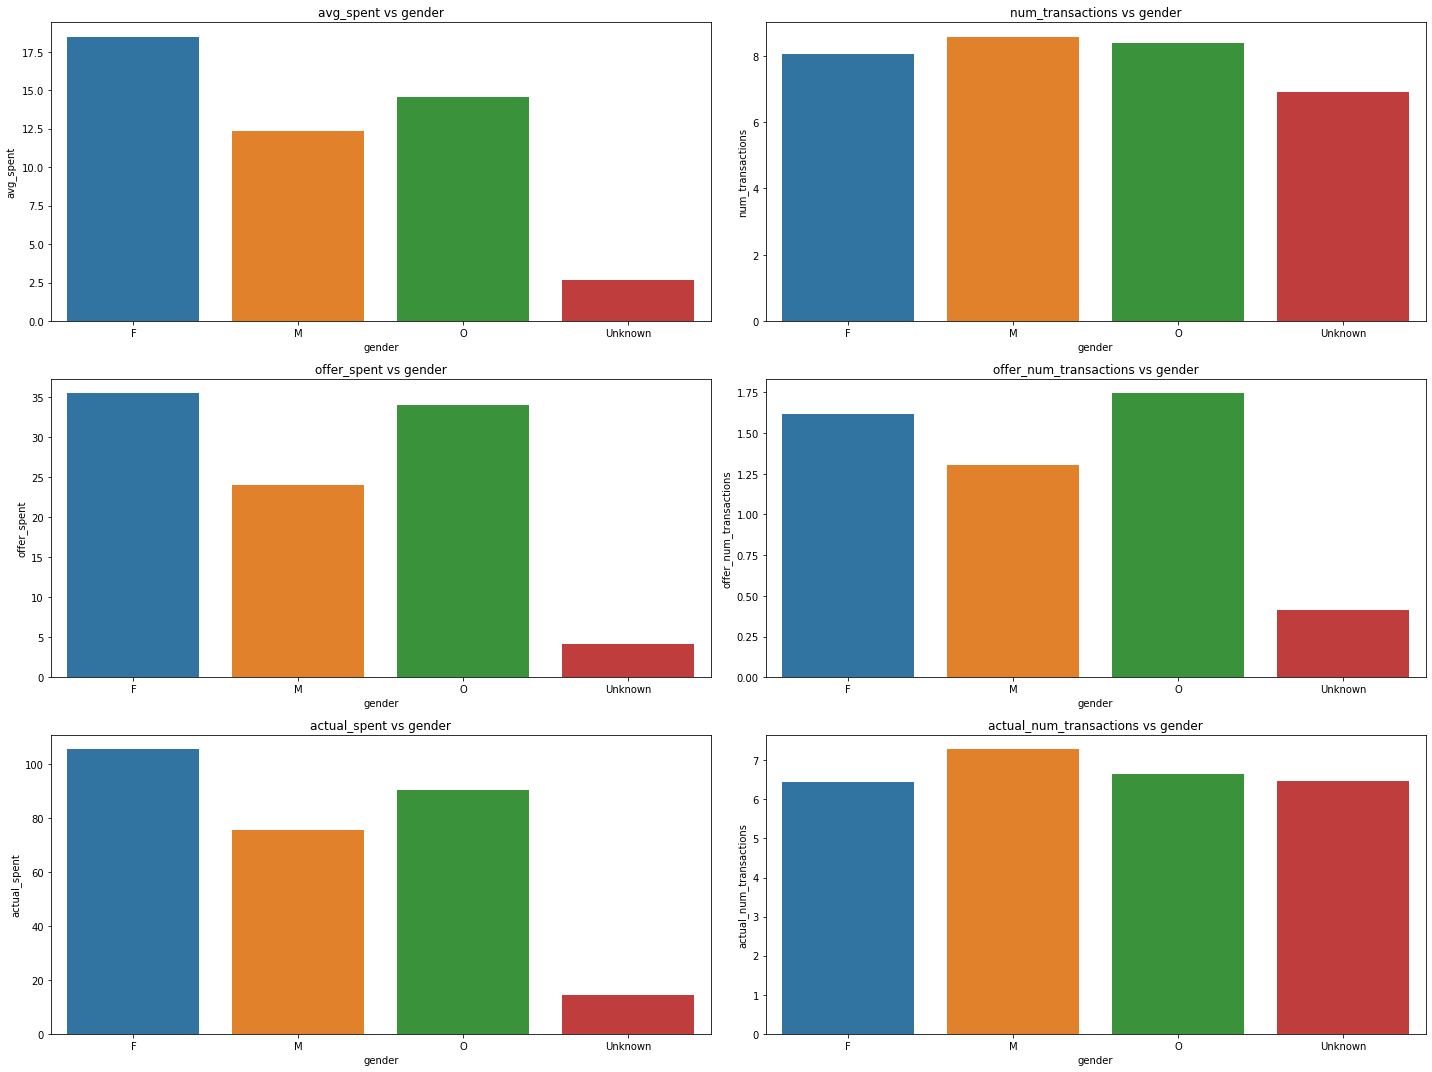

In [185]:
columns = ['avg_spent','num_transactions', 'offer_spent', 'offer_num_transactions', 'actual_spent', 'actual_num_transactions']

subplot_barplot_gender(customer_df,columns,'gender')

**Observations**: 

- Females have higher offer-associated and actual spent than all others, and higher offer-associated number of transaction than males. 
- Unknown (representing Nulls), do not have a total spent as much as the rest, but has a transaction number associated with no offers, almost on par with females and others.

In [186]:
def subplot_distplot(dataframe, list_of_columns, bins, kde):
    '''This function creates subplots of histograms by passing in a dataframe and list of columns, 
    number of bins and whether to show the kernel density plot.'''
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20,nrows*5)) 
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        sns.distplot(dataframe[col], ax = ax[i], kde = kde, bins = bins) #hist_kws={'histtype':'stepfilled'}
        ax[i].set_title(f'Distribution of {col}')
        ax[i].set_xlabel(col)
        ax[i].set_ylabel('Count')
    plt.tight_layout()

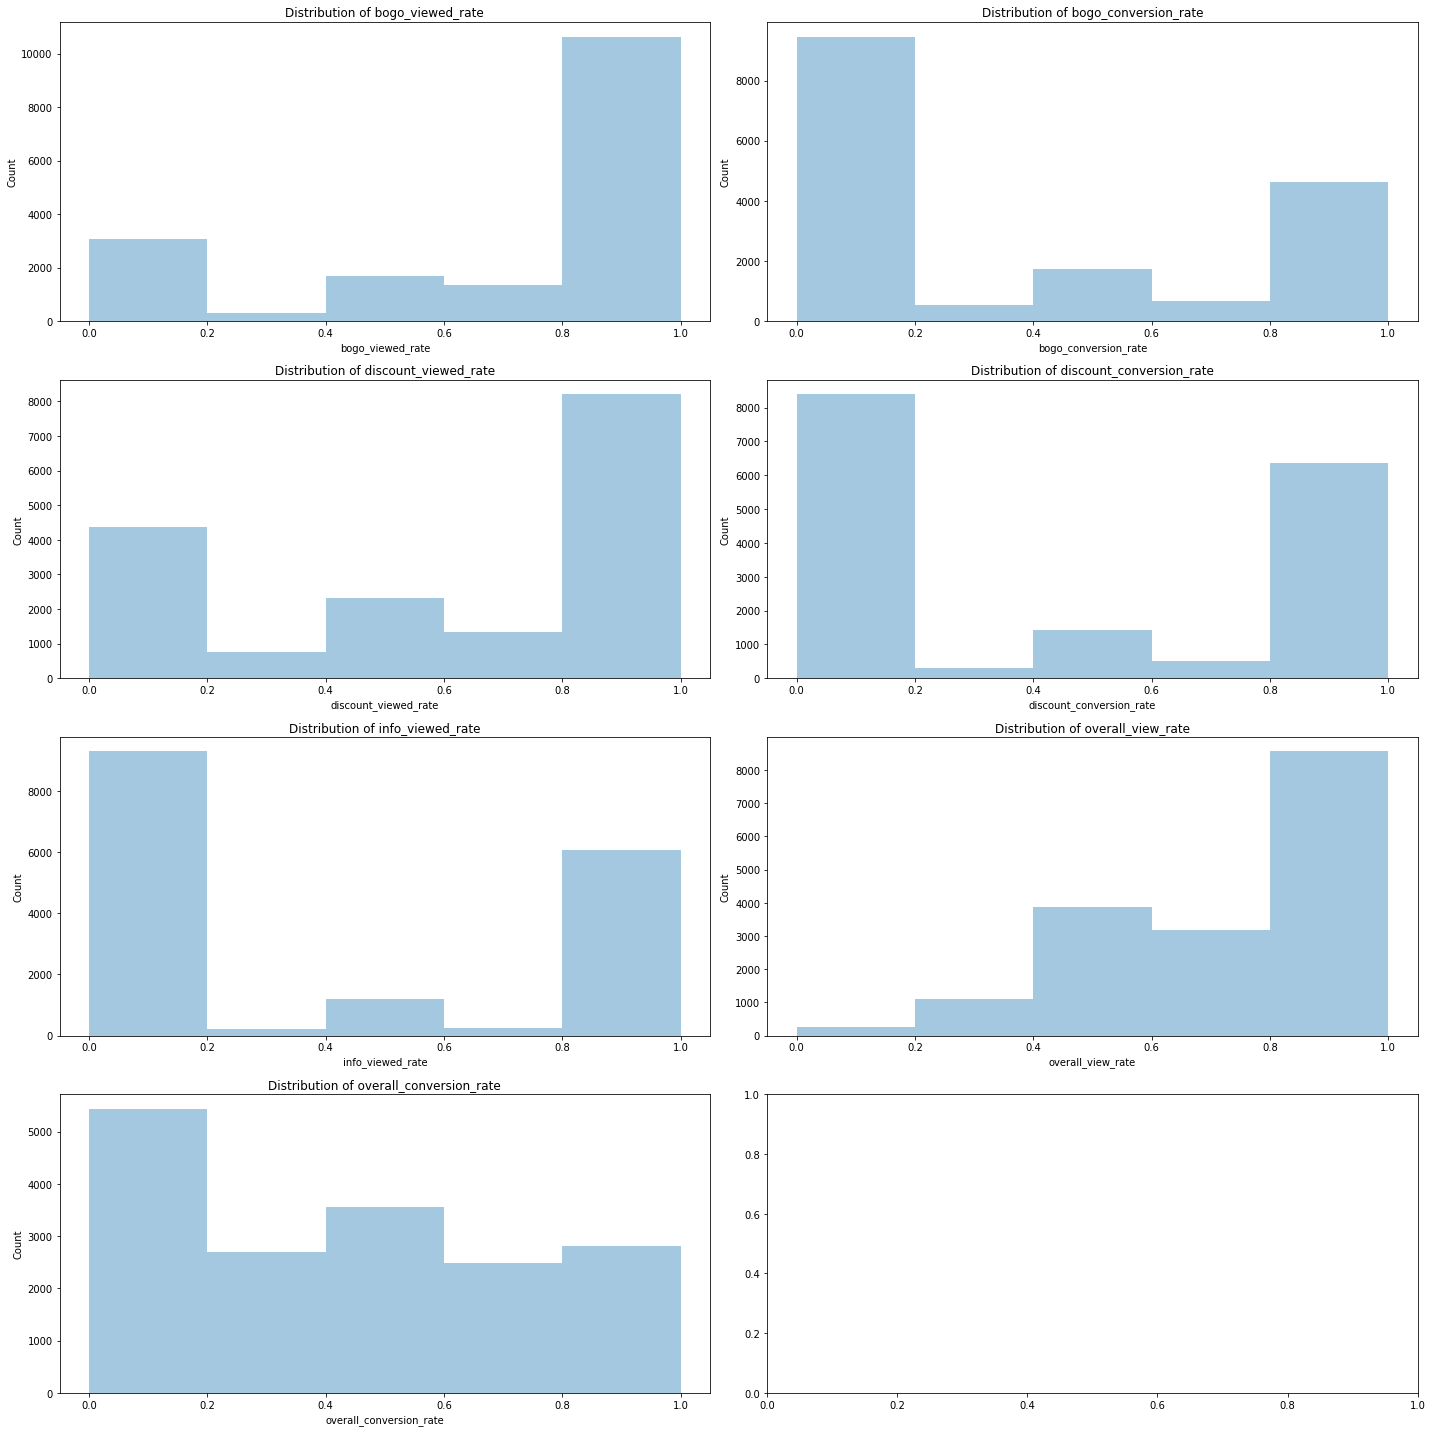

In [187]:
cols_to_plot = ['bogo_viewed_rate', 'bogo_conversion_rate','discount_viewed_rate', 'discount_conversion_rate', 
                'info_viewed_rate', 'overall_view_rate', 'overall_conversion_rate']

subplot_distplot(customer_df,cols_to_plot,5, False)

**Observations:**
- BOGO offers are viewed more than DISCOUNT offers. Informational offers are viewed far less. 
- DISCOUNT offers are completed more than BOGO offers.



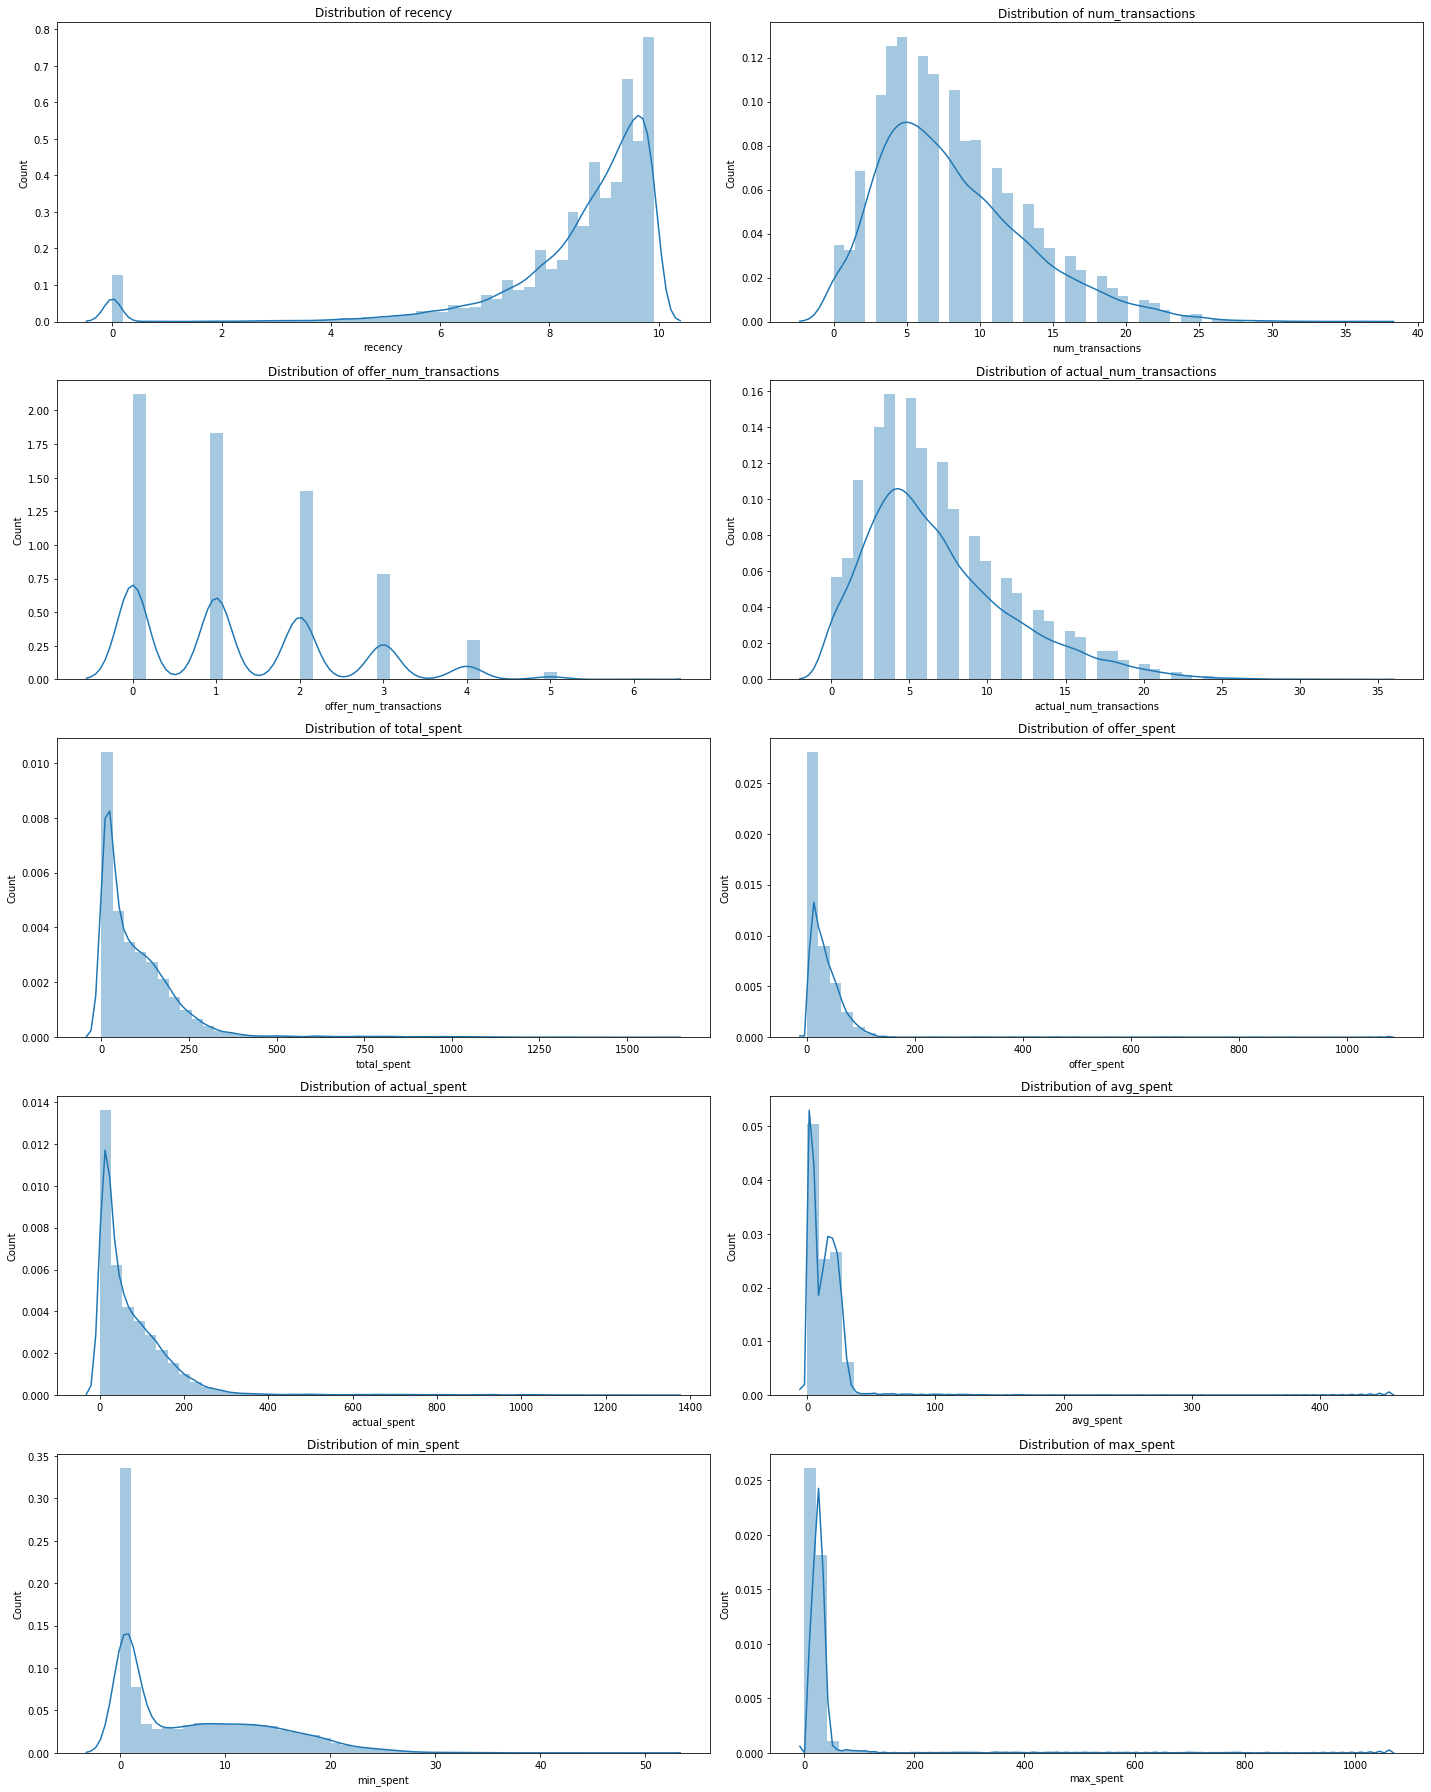

In [188]:
cols_to_plot = ['recency', 'num_transactions', 'offer_num_transactions', 'actual_num_transactions', 'total_spent', 'offer_spent', 'actual_spent', 
                'avg_spent', 'min_spent', 'max_spent']

subplot_distplot(customer_df,cols_to_plot, None, True)

**Observations**:
- Recency: in the dataset, most of the customers's last visit to starbucks are recent / not too long ago. There is a small spike at low recency, indicating a proportion of customers who havent visited starbucks in a long time.
- Number of transactions and actual_num_transactions (non-offer) have a right skew, peaking at around 5 transactions.  
- offer_num_transactions: The number of offer related number of transactions decreases in count, meaning less people are completing higher number of offer-related transactions.
- Total spent, offer spent, actual spent, all have a right skew. The distribution of actual spent is actually more similar to total spent, indicating that offer spent may not take up a lot in proportion for total spent.
- Avg spent: Skewed right, with a peak at below 10 dollars and around 20 dollars.
- Min Spent: Skewed right, with a peak at below 2 dollars.
- Max Spent: Peaks at lower range ~50 dollars with majority at the lower range between 0-20 dollars.